这个代码是调查储层的动力学，即beta_prime和theta，与TIMs之间的因果关系的

#### Pareto front数据

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import pickle

In [9]:
# 提取数据
# 数据1：Pareto front数据
path1 = r"C:\Users\Chen\Desktop\Repository\spnc_taskindependent_metrics\saved_studies\dynamicstims_beta20to50_theta001to06_20251017_125116_pareto.csv"

pareto_front = pd.read_csv(path1)

pareto_MC = pareto_front["values"].apply(lambda x: ast.literal_eval(x)[1])
pareto_CQ = pareto_front["values"].apply(lambda x: ast.literal_eval(x)[0])

pareto_beta = pareto_front['param_beta_prime']
pareto_theta = pareto_front['param_theta']


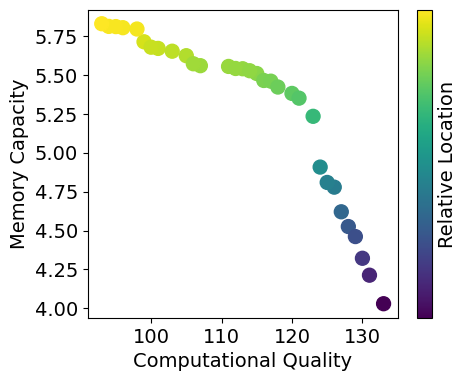

In [56]:
plt.figure(figsize=(5, 4))
plt.scatter(pareto_CQ, pareto_MC, c=pareto_MC, cmap='viridis', s=100)
cbar = plt.colorbar(label='Relative Location', ticks=[])
cbar.set_label('Relative Location', fontsize=14)
plt.xlabel('Computational Quality', fontsize=14)
plt.ylabel('Memory Capacity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

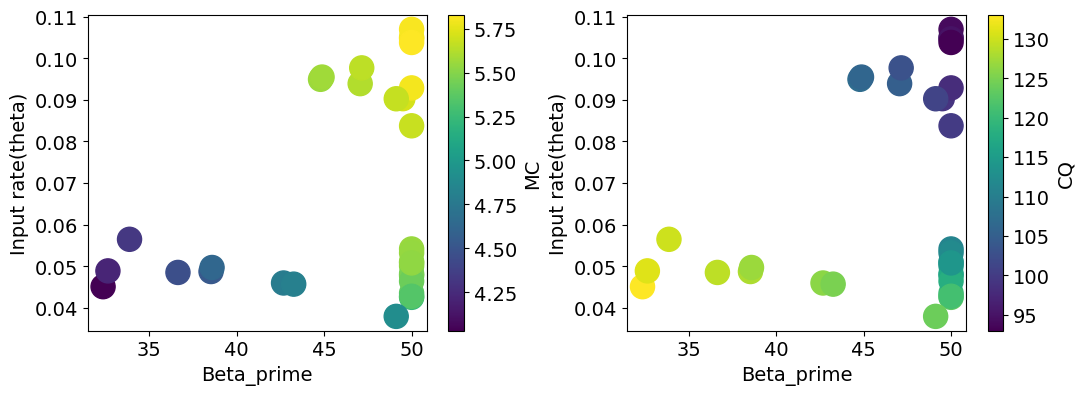

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
# 子图1: NRMSE
sc1 = axs[0].scatter(pareto_beta, pareto_theta, c=pareto_MC, cmap='viridis', s=300)
cbar1 = plt.colorbar(sc1, ax=axs[0])
cbar1.set_label('MC', fontsize=14)
cbar1.ax.tick_params(labelsize=14)
axs[0].set_xlabel('Beta_prime', fontsize=14)
axs[0].set_ylabel('Input rate(theta)', fontsize=14)
axs[0].tick_params(axis='both', labelsize=14)

# 子图2: Error Rate
sc2 = axs[1].scatter(pareto_beta, pareto_theta, c=pareto_CQ, cmap='viridis', s=300)
cbar2 = plt.colorbar(sc2, ax=axs[1])
cbar2.set_label('CQ', fontsize=14)
cbar2.ax.tick_params(labelsize=14)
axs[1].set_xlabel('Beta_prime', fontsize=14)
axs[1].set_ylabel('Input rate(theta)', fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()

#### Grid search数据

In [14]:
# 提取数据
with open('../Res_Tasks_Results/Reservoir_Res_beta20to50_theta001to06/results.pkl', 'rb') as f:
    grid_search = pickle.load(f)

# 定义名称
grid_MC = grid_search['runs'][0]['results']['MC']
grid_CQ = grid_search['runs'][1]['results']['CQ']
grid_nrmse = grid_search['runs'][2]['results']['NRMSE']
grid_acc = grid_search['runs'][3]['results']['acc']

grid_beta = grid_search['runs'][0]['results']['beta_prime']
grid_theta = grid_search['runs'][0]['results']['theta']



In [44]:
# 插值法和heatmap函数
# 使用插值法平滑数据
from scipy.interpolate import griddata
import numpy as np
import pandas as pd

def interpolation(x, y, z, nx=200, ny=200):
    x = np.asarray(x).ravel()   
    y = np.asarray(y).ravel()
    z = np.asarray(z).ravel()

    # confirm the length of x and y are the same
    if x.shape[0] != y.shape[0] or x.shape[0] != z.shape[0]:
        raise ValueError("x and y must have the same length")
    
    # generate the grid
    xi = np.linspace(x.min(), x.max(), nx)
    yi = np.linspace(y.min(), y.max(), ny)
    Xi, Yi = np.meshgrid(xi, yi)

    # interpolate the data
    zi = griddata((x, y), z, (Xi, Yi), method='cubic')

    return Xi, Yi, zi

def plot_heatmap(x, y, zi, xlabel = 'beta_prime', ylabel = 'theta',value_label='MC'):

    plt.figure(figsize=(5,4))
    pcm = plt.pcolormesh(x, y, zi, cmap='viridis', shading='auto')
    cbar = plt.colorbar(pcm)
    cbar.set_label(value_label, fontsize=14)
    cbar.ax.tick_params(labelsize=14)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

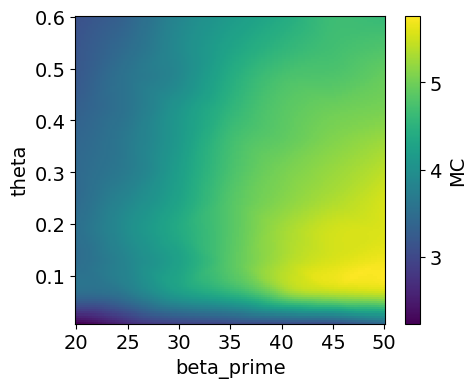

In [45]:
# MC与dynamcis的关系
x = np.array(grid_beta)
y = np.array(grid_theta)
z = np.array(grid_MC)

Xi, Yi, zi = interpolation(x, y, z, nx=150, ny=150)

plot_heatmap(Xi, Yi, zi, value_label='MC')

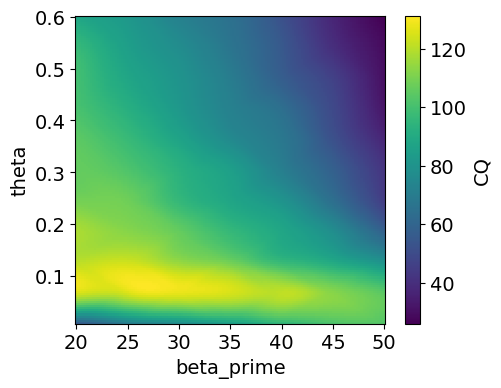

In [46]:
# CQ与dynamcis的关系
x = np.array(grid_beta)
y = np.array(grid_theta)
z = np.array(grid_CQ)

Xi, Yi, zi = interpolation(x, y, z, nx=150, ny=150)

plot_heatmap(Xi, Yi, zi, value_label='CQ')

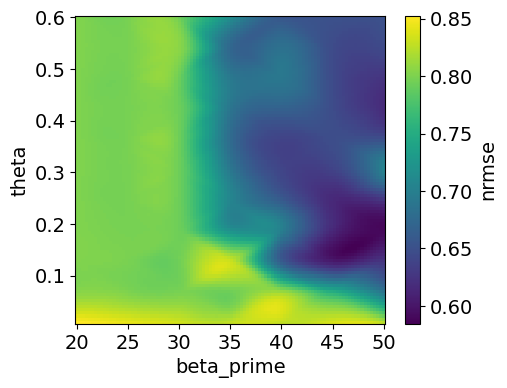

In [47]:
# nrmse与dynamcis的关系
x = np.array(grid_beta)
y = np.array(grid_theta)
z = np.array(grid_nrmse)

Xi, Yi, zi = interpolation(x, y, z, nx=100, ny=100)

plot_heatmap(Xi, Yi, zi, value_label='nrmse')

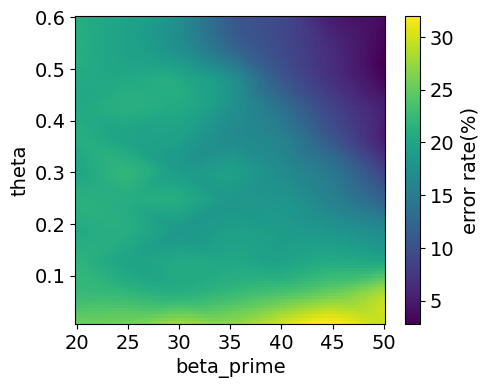

In [48]:
# acc与dynamcis的关系
x = np.array(grid_beta)
y = np.array(grid_theta)
z = np.array(grid_acc)
z = (1-z)*100


Xi, Yi, zi = interpolation(x, y, z, nx=100, ny=100)

plot_heatmap(Xi, Yi, zi, value_label='error rate(%)')